https://my.oschina.net/DDigimon/blog/1236298

In [612]:
#print(__doc__)
import cv2
import matplotlib.pyplot as plt
import imutils
from imutils.perspective import four_point_transform

In [943]:
#读入图片
image = cv2.imread("D:\work\picture\IMG_9517.jpg")
#plt.figure(figsize = (20,20))
#plt.subplot(221)
#plt.imshow(image)
#plt.title("original")

#转换为灰度图像
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
#plt.subplot(222)
#plt.imshow(gray)
#plt.title("gray")
#高斯滤波
#blurred =cv2.blur(image,(5,5))
#blurred = cv2.GaussianBlur(gray, (3, 3), 0)
blurred = cv2.medianBlur(gray,33)
#自适应二值化方法
blurred = cv2.adaptiveThreshold(blurred,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,51,2)
#_,blurred = cv2.threshold(blurred,150,200,cv2.THRESH_BINARY)
#blurred = cv2.threshold(gray,127,255,0)
#plt.subplot(223)
#plt.imshow(blurred)
#plt.title("blurred")
'''
adaptiveThreshold函数：第一个参数src指原图像，原图像应该是灰度图。
    第二个参数x指当像素值高于（有时是小于）阈值时应该被赋予的新的像素值
    第三个参数adaptive_method 指： CV_ADAPTIVE_THRESH_MEAN_C 或 CV_ADAPTIVE_THRESH_GAUSSIAN_C
    第四个参数threshold_type  指取阈值类型：必须是下者之一  
                                 •  CV_THRESH_BINARY,
                        • CV_THRESH_BINARY_INV
    第五个参数 block_size 指用来计算阈值的象素邻域大小: 3, 5, 7, ...
    第六个参数param1    指与方法有关的参数。对方法CV_ADAPTIVE_THRESH_MEAN_C 和 CV_ADAPTIVE_THRESH_GAUSSIAN_C， 它是一个从均值或加权均值提取的常数, 尽管它可以是负数。
'''
#这一步可有可无，主要是增加一圈白框，以免刚好卷子边框压线后期边缘检测无果。好的样本图就不用考虑这种问题
blurred=cv2.copyMakeBorder(blurred,5,5,5,5,cv2.BORDER_CONSTANT,value=(255,255,255))
#plt.subplot(224)
#plt.imshow(blurred)
#plt.title("blurred2")


In [944]:
edged = cv2.Canny(blurred, 10, 100)
# 从边缘图中寻找轮廓，然后初始化答题卡对应的轮廓
#plt.figure(figsize = (20,20))
#plt.subplot(221)
#plt.imshow(edged)
#plt.title("edged")

'''
findContours
image -- 要查找轮廓的原图像
mode -- 轮廓的检索模式，它有四种模式：
     cv2.RETR_EXTERNAL  表示只检测外轮廓                                  
     cv2.RETR_LIST 检测的轮廓不建立等级关系
     cv2.RETR_CCOMP 建立两个等级的轮廓，上面的一层为外边界，里面的一层为内孔的边界信息。如果内孔内还有一个连通物体，
              这个物体的边界也在顶层。
     cv2.RETR_TREE 建立一个等级树结构的轮廓。
method --  轮廓的近似办法：
     cv2.CHAIN_APPROX_NONE 存储所有的轮廓点，相邻的两个点的像素位置差不超过1，即max （abs (x1 - x2), abs(y2 - y1) == 1
     cv2.CHAIN_APPROX_SIMPLE压缩水平方向，垂直方向，对角线方向的元素，只保留该方向的终点坐标，例如一个矩形轮廓只需
                       4个点来保存轮廓信息
      cv2.CHAIN_APPROX_TC89_L1，CV_CHAIN_APPROX_TC89_KCOS使用teh-Chinl chain 近似算法
'''
_,cnts,_ = cv2.findContours(edged, cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
#cnts = cnts[0] if imutils.is_cv2() else cnts[1]
docCnt = None
# 确保至少有一个轮廓被找到
if len(cnts) > 0:
    # 将轮廓按大小降序排序
    #print("before sorted:", cnts)
    cnts = sorted(cnts, key=cv2.contourArea, reverse=True)
    #print("after sorted:", cnts)
    
    # 对排序后的轮廓循环处理
    for c in cnts:
        # 获取近似的轮廓
        peri = cv2.arcLength(c, True)
        approx = cv2.approxPolyDP(c, 0.04 * peri, True)
        # 如果近似轮廓有四个顶点，那么就认为找到了答题卡
        if len(approx) == 4:
            docCnt = approx
            break

print ("type(contours):",type(cnts))
print ("type(contours[0]):",type(cnts[0]))
print ("len(contour):",len(cnts))
print ("length of contour[0]:",len(cnts[0]))
print ("length of contour[1]:",len(cnts[1]))

type(contours): <class 'list'>
type(contours[0]): <class 'numpy.ndarray'>
len(contour): 9462
length of contour[0]: 1280
length of contour[1]: 64


Text(0.5,1,'newimage_with-four_points')

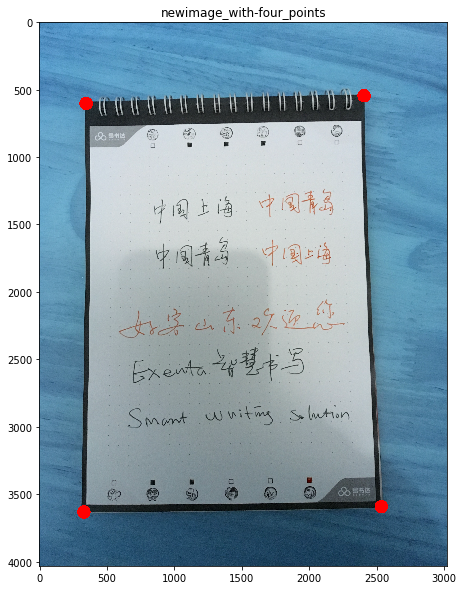

In [945]:
newimage=image.copy()
plt.figure(figsize = (10,10))

for i in docCnt:
    #circle函数为在图像上作图，新建了一个图像用来演示四角选取
    cv2.circle(newimage, (i[0][0],i[0][1]), 50, (255, 0, 0), -1)
plt.imshow(newimage)
plt.title("newimage_with-four_points")

In [946]:
paper = four_point_transform(image, docCnt.reshape(4, 2))
warped = four_point_transform(gray, docCnt.reshape(4, 2))

print(docCnt)
#M = cv2.getPerspectiveTransform(pts1,pts2)
#dst = cv2.warpPerspective(img,M,(200,300))

[[[2409  546]]

 [[ 349  603]]

 [[ 332 3631]]

 [[2538 3591]]]


In [947]:
#plt.figure(figsize = (20,20))
#plt.imshow(warped)

Text(0.5,1,'Finalcut')

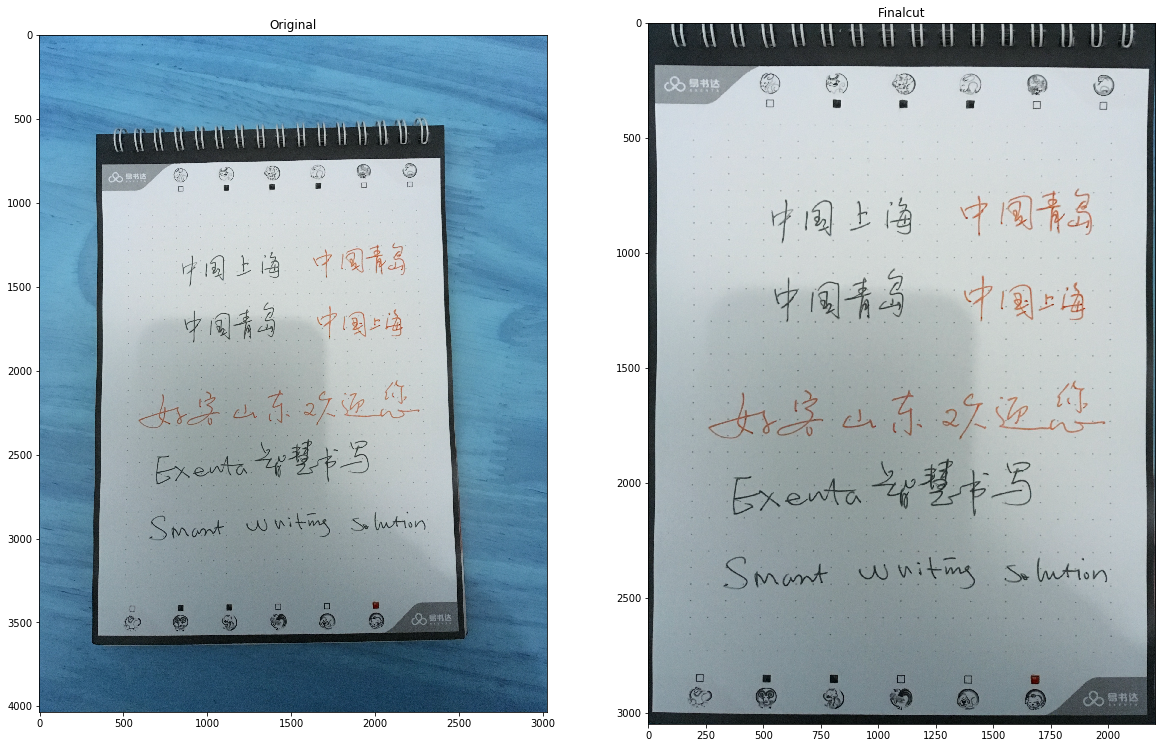

In [948]:
plt.figure(figsize = (20,20))
plt.subplot(121)
plt.imshow(image)
plt.title('Original')
plt.subplot(122)
plt.imshow(paper)
plt.title('Finalcut')